## insiasi library

In [31]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

## Regresi

In [32]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "faang_stock_prices.csv"


df_regresi = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "vishardmehta/faang-stock-market-data-with-technical-indicators",
  file_path,
)

/tmp/ipython-input-647938935.py:7: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_regresi = kagglehub.load_dataset(


Using Colab cache for faster access to the 'faang-stock-market-data-with-technical-indicators' dataset.


In [33]:
df_regresi.columns

Index(['Date', 'Ticker', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_7',
       'SMA_21', 'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal',
       'Bollinger_Upper', 'Bollinger_Lower', 'Daily_Return', 'Volatility_7d',
       'Next_Day_Close'],
      dtype='object')

In [34]:
df_regresi.head()

,Date,Ticker,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,MACD,MACD_Signal,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close
0,2016-02-23,AAPL,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,52.112369,-0.107176,-0.149939,22.401531,20.889519,-0.022605,0.018130,21.785145
1,2016-02-23,AMZN,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,50.230010,-0.598529,-0.896261,31.103668,22.908382,-0.011725,0.022486,27.702000
2,2016-02-23,GOOGL,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,28.846871,-0.209017,-0.219158,38.439218,33.798573,-0.016131,0.015153,35.774696
3,2016-02-23,META,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,34.031434,1.216863,1.318966,115.829165,92.886882,-0.015864,0.019720,106.138588
4,2016-02-23,MSFT,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,42.877882,0.038144,-0.096534,48.143898,42.459504,-0.027920,0.019161,45.294239


In [35]:
df_regresi.isna().sum()

,0
Date,0
Ticker,0
Open,0
High,0
Low,0
Close,0
Volume,0
SMA_7,0
SMA_21,0
EMA_12,0


In [36]:
df_regresi.nunique()

,0
Date,2494
Ticker,6
Open,14854
High,14890
Low,14894
Close,14660
Volume,14765
SMA_7,14949
SMA_21,14959
EMA_12,14964


In [37]:
hist_cols = [
    'Open', 'High', 'Low', 'Close', 'Volume',
    'SMA_7', 'SMA_21', 'EMA_12', 'EMA_26',
    'RSI_14', 'MACD', 'MACD_Signal',
    'Bollinger_Upper', 'Bollinger_Lower',
    'Daily_Return', 'Volatility_7d',
    'Next_Day_Close'
]

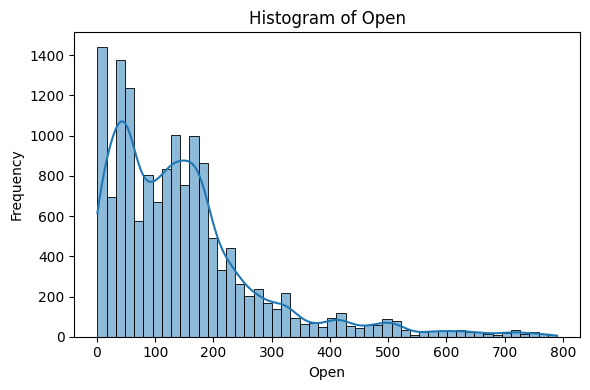

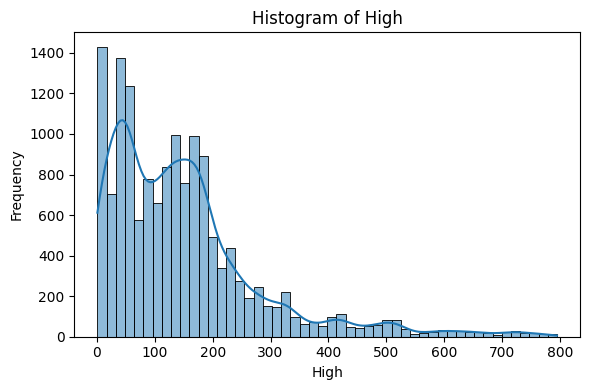

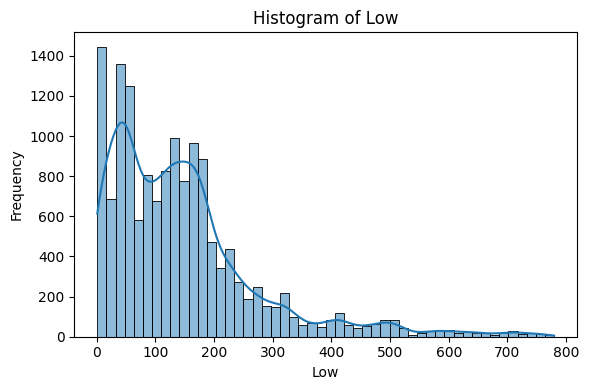

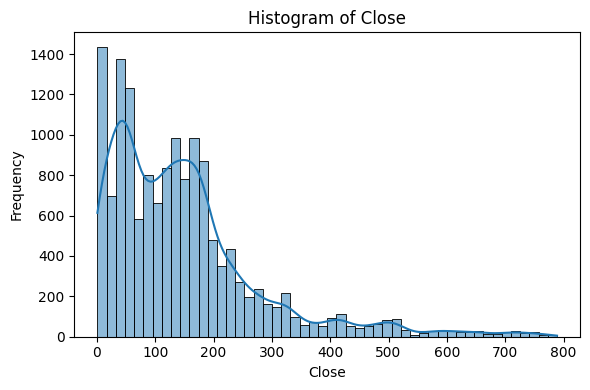

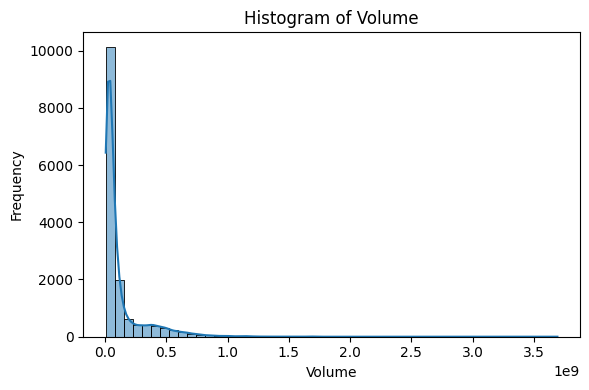

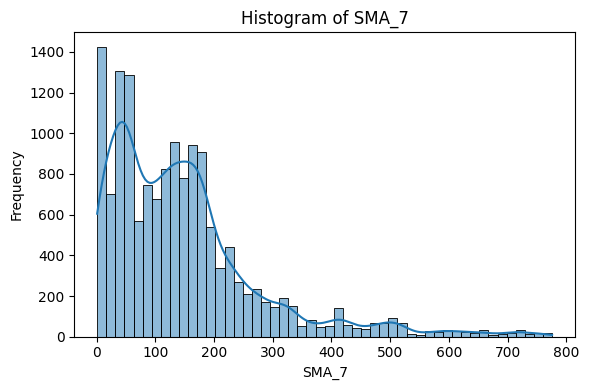

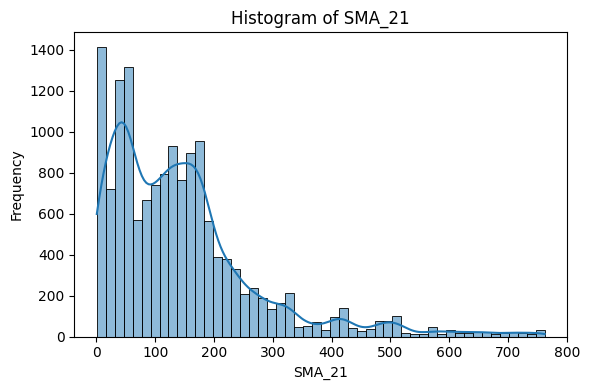

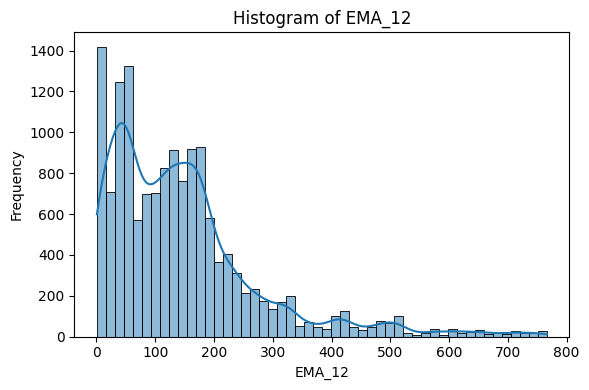

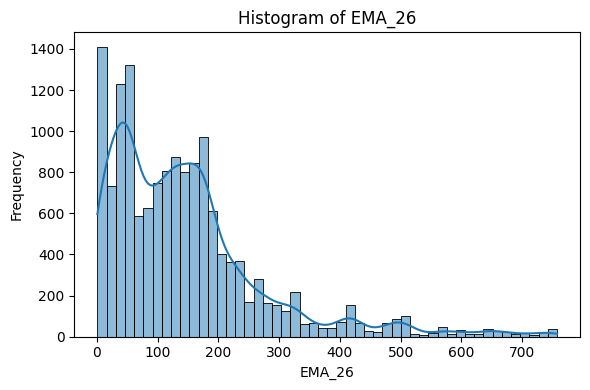

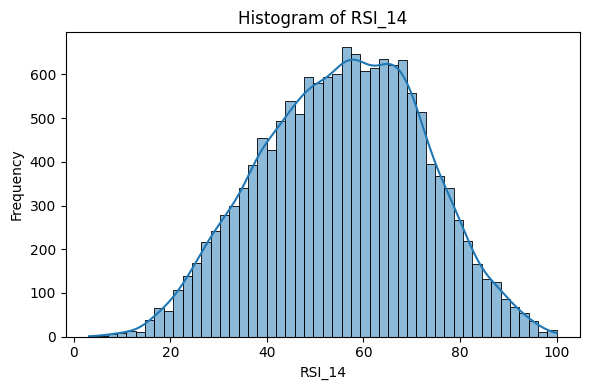

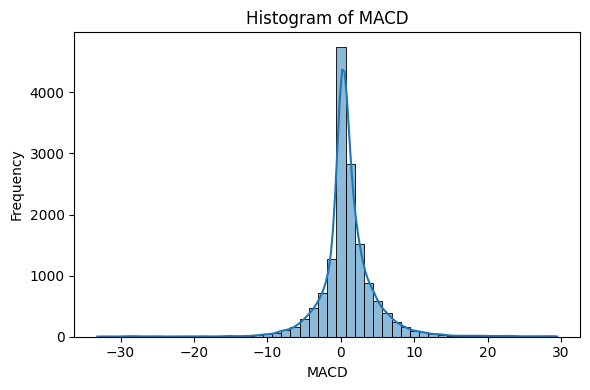

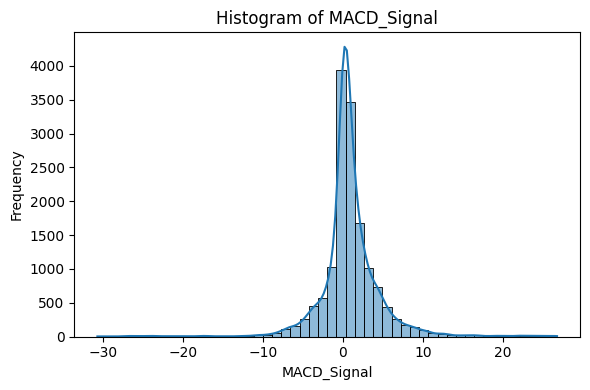

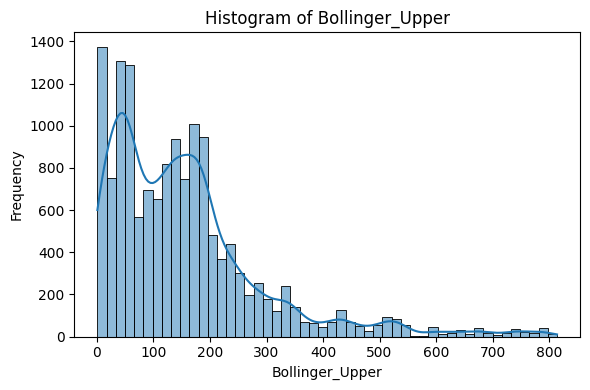

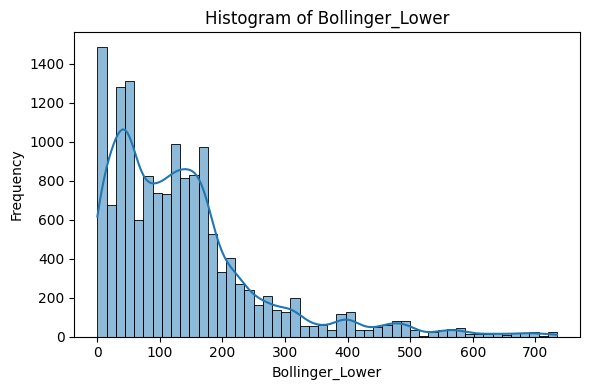

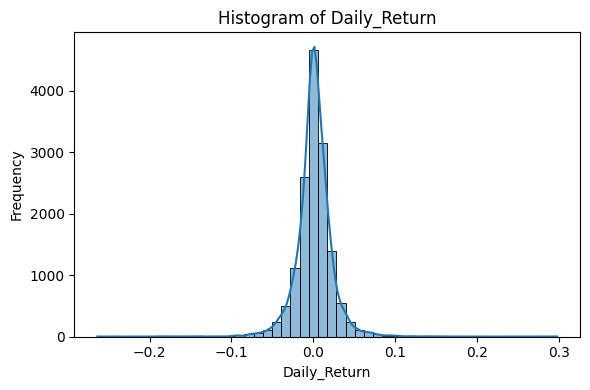

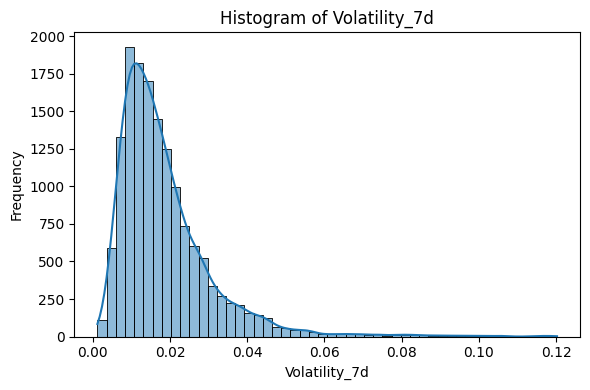

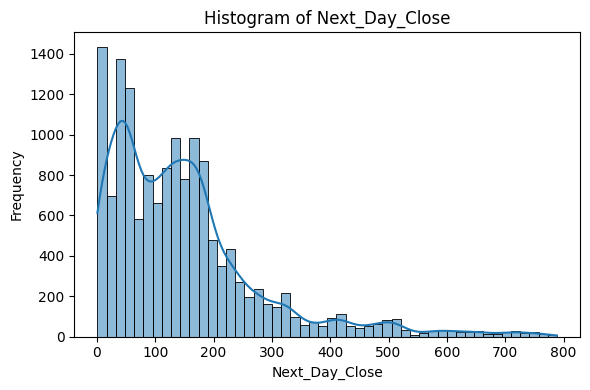

In [38]:

for col in hist_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(
        data=df_regresi,
        x=col,
        bins=50,
        kde=True
    )
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [39]:
df_regresi.dtypes

,0
Date,object
Ticker,object
Open,float64
High,float64
Low,float64
Close,float64
Volume,int64
SMA_7,float64
SMA_21,float64
EMA_12,float64


In [40]:
df_regresi['Ticker'].value_counts()

,count
Ticker,
AAPL,2494
AMZN,2494
GOOGL,2494
META,2494
MSFT,2494
NVDA,2494


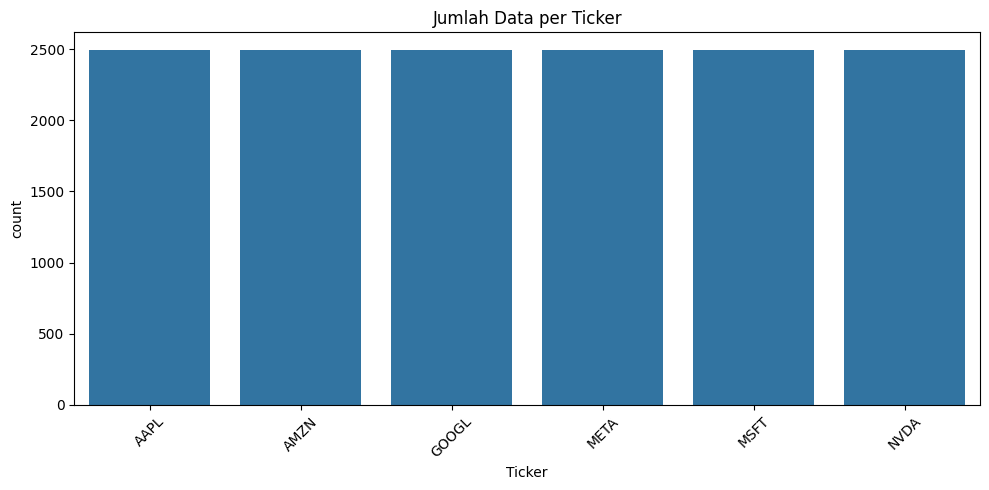

In [41]:
plt.figure(figsize=(10, 5))
sns.countplot(
    data=df_regresi,
    x='Ticker'
)
plt.xticks(rotation=45)
plt.title('Jumlah Data per Ticker')
plt.tight_layout()
plt.show()

In [42]:
df_clean=pd.get_dummies(df_regresi, columns=['Ticker'])

In [43]:
df_clean.head()

,Date,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,...,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close,Ticker_AAPL,Ticker_AMZN,Ticker_GOOGL,Ticker_META,Ticker_MSFT,Ticker_NVDA
0,2016-02-23,21.853144,21.875812,21.433763,21.465500,127770400,21.782546,21.682435,21.720115,21.827292,...,20.889519,-0.022605,0.018130,21.785145,True,False,False,False,False,False
1,2016-02-23,27.777500,27.845501,27.266500,27.646999,81016000,26.675857,27.140333,26.765295,27.363824,...,22.908382,-0.011725,0.022486,27.702000,False,True,False,False,False,False
2,2016-02-23,36.032746,36.270944,35.515157,35.595547,41332000,35.747473,36.132564,35.810892,36.019909,...,33.798573,-0.016131,0.015153,35.774696,False,False,True,False,False,False
3,2016-02-23,106.108789,106.724491,104.390794,104.728432,25319300,103.488525,103.976073,103.607174,102.390311,...,92.886882,-0.015864,0.019720,106.138588,False,False,False,True,False,False
4,2016-02-23,46.158514,46.184970,44.959133,45.135513,28895300,45.542440,45.303900,45.301104,45.262960,...,42.459504,-0.027920,0.019161,45.294239,False,False,False,False,True,False


In [44]:
df_clean.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_7', 'SMA_21',
       'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal', 'Bollinger_Upper',
       'Bollinger_Lower', 'Daily_Return', 'Volatility_7d', 'Next_Day_Close',
       'Ticker_AAPL', 'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META',
       'Ticker_MSFT', 'Ticker_NVDA'],
      dtype='object')

In [45]:
df_clean.drop(columns=['Ticker_AAPL'], inplace=True)

In [46]:
df_clean.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'SMA_7', 'SMA_21',
       'EMA_12', 'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal', 'Bollinger_Upper',
       'Bollinger_Lower', 'Daily_Return', 'Volatility_7d', 'Next_Day_Close',
       'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_MSFT',
       'Ticker_NVDA'],
      dtype='object')

In [47]:
date=df_clean['Date']

In [48]:
df_clean.drop(columns=['Date'], inplace=True)

In [49]:
corr=df_clean.corr()

In [50]:
corr

,Open,High,Low,Close,Volume,SMA_7,SMA_21,EMA_12,EMA_26,RSI_14,...,Bollinger_Upper,Bollinger_Lower,Daily_Return,Volatility_7d,Next_Day_Close,Ticker_AMZN,Ticker_GOOGL,Ticker_META,Ticker_MSFT,Ticker_NVDA
Open,1.000000,0.999871,0.999872,0.999738,-0.406993,0.999372,0.997618,0.999120,0.997816,-0.037939,...,0.996435,0.996347,-0.015577,-0.086416,0.999335,-0.085835,-0.154647,0.455436,0.265015,-0.373007
High,0.999871,1.000000,0.999828,0.999874,-0.406354,0.999362,0.997673,0.999141,0.997895,-0.037971,...,0.996647,0.996214,-0.010022,-0.082837,0.999452,-0.085929,-0.154832,0.456975,0.263631,-0.372616
Low,0.999872,0.999828,1.000000,0.999882,-0.408144,0.999260,0.997364,0.998970,0.997576,-0.034507,...,0.996045,0.996260,-0.009493,-0.090087,0.999468,-0.086180,-0.154324,0.454328,0.266419,-0.373910
Close,0.999738,0.999874,0.999882,1.000000,-0.407336,0.999242,0.997455,0.998999,0.997676,-0.034873,...,0.996286,0.996168,-0.003646,-0.086487,0.999551,-0.086102,-0.154632,0.455631,0.265147,-0.373286
Volume,-0.406993,-0.406354,-0.408144,-0.407336,1.000000,-0.407130,-0.407043,-0.407278,-0.407554,0.010957,...,-0.403202,-0.410184,0.026862,0.413534,-0.407296,-0.110385,-0.200218,-0.230162,-0.216314,0.801669
SMA_7,0.999372,0.999362,0.999260,0.999242,-0.407130,1.000000,0.998795,0.999839,0.998887,-0.050527,...,0.997619,0.997485,-0.020912,-0.084579,0.998843,-0.085886,-0.154912,0.455751,0.265313,-0.373592
SMA_21,0.997618,0.997673,0.997364,0.997455,-0.407043,0.998795,1.000000,0.999483,0.999850,-0.080158,...,0.998811,0.998449,-0.022137,-0.076273,0.997073,-0.085366,-0.155494,0.456073,0.265663,-0.374351
EMA_12,0.999120,0.999141,0.998970,0.998999,-0.407278,0.999839,0.999483,1.000000,0.999514,-0.060150,...,0.998313,0.998078,-0.020484,-0.081623,0.998600,-0.085731,-0.155176,0.456043,0.265540,-0.374008
EMA_26,0.997816,0.997895,0.997576,0.997676,-0.407554,0.998887,0.999850,0.999514,1.000000,-0.076416,...,0.998811,0.998111,-0.021795,-0.075397,0.997288,-0.085197,-0.155762,0.456576,0.266004,-0.374991
RSI_14,-0.037939,-0.037971,-0.034507,-0.034873,0.010957,-0.050527,-0.080158,-0.060150,-0.076416,1.000000,...,-0.078598,-0.079162,0.226884,-0.219506,-0.035442,-0.021777,-0.006511,-0.030455,0.011930,0.035814


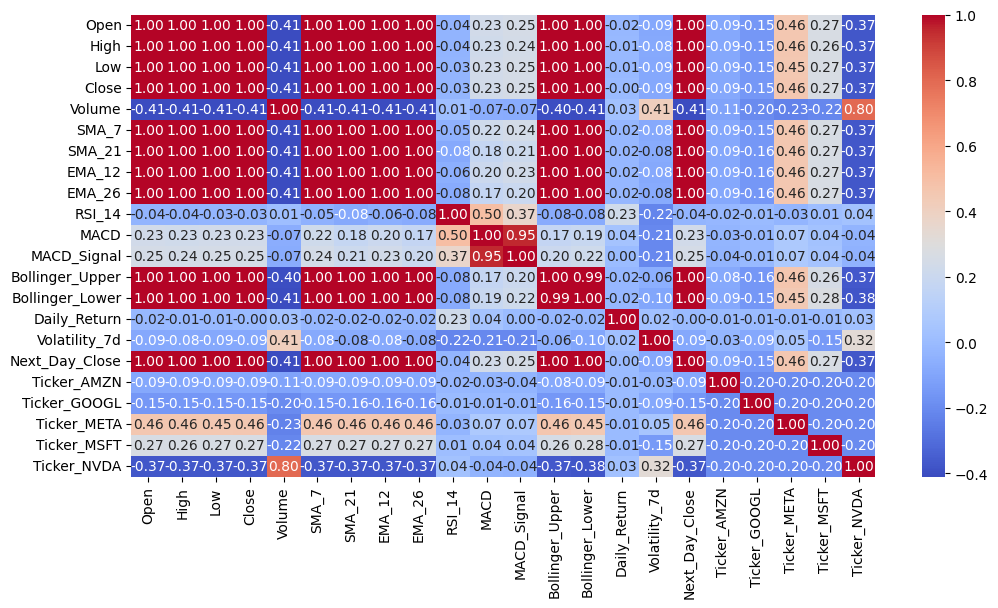

In [51]:
plt.figure(figsize=(12,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

In [52]:
df_clean.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'SMA_7', 'SMA_21', 'EMA_12',
       'EMA_26', 'RSI_14', 'MACD', 'MACD_Signal', 'Bollinger_Upper',
       'Bollinger_Lower', 'Daily_Return', 'Volatility_7d', 'Next_Day_Close',
       'Ticker_AMZN', 'Ticker_GOOGL', 'Ticker_META', 'Ticker_MSFT',
       'Ticker_NVDA'],
      dtype='object')

In [53]:
mean = df_clean.mean()
std = df_clean.std()

# Hitung CV
cv = std / mean

# Buat dataframe rapi
cv_df = pd.DataFrame({
    'Feature': cv.index,
    'CV': cv.values
}).sort_values(by='CV', ascending=False)

print(cv_df)

            Feature         CV
14     Daily_Return  16.534424
10             MACD   4.713628
11      MACD_Signal   4.427708
20      Ticker_MSFT   2.236143
19      Ticker_META   2.236143
18     Ticker_GOOGL   2.236143
21      Ticker_NVDA   2.236143
17      Ticker_AMZN   2.236143
4            Volume   1.592805
13  Bollinger_Lower   0.899535
6            SMA_21   0.896495
2               Low   0.896131
0              Open   0.896127
12  Bollinger_Upper   0.896043
5             SMA_7   0.895889
8            EMA_26   0.895798
7            EMA_12   0.895749
3             Close   0.895594
1              High   0.895472
16   Next_Day_Close   0.895402
15    Volatility_7d   0.670619
9            RSI_14   0.298049


In [54]:
selected_features = [
    'Daily_Return',
    'Volatility_7d',
    'RSI_14',
    'MACD'         
]

In [55]:
df_clean['Date']= date
df_clean = df_clean.sort_values(by='Date')

In [56]:
selected_features = [
    'Volatility_7d',
    'RSI_14',
    'MACD'
]

df_model = df_clean[['Date'] + selected_features].copy()

In [57]:
df_model['target'] = df_clean['Daily_Return'].shift(-1)

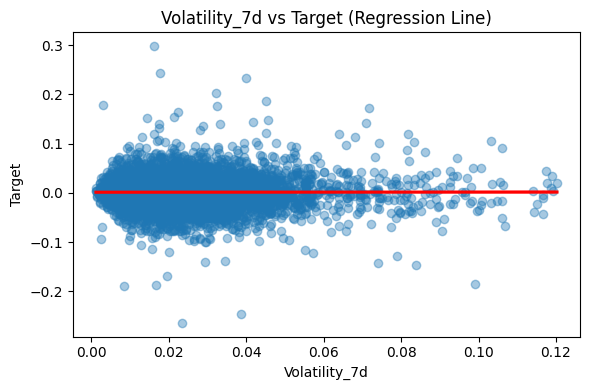

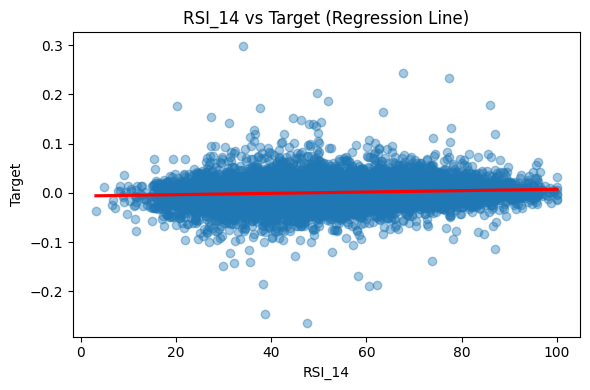

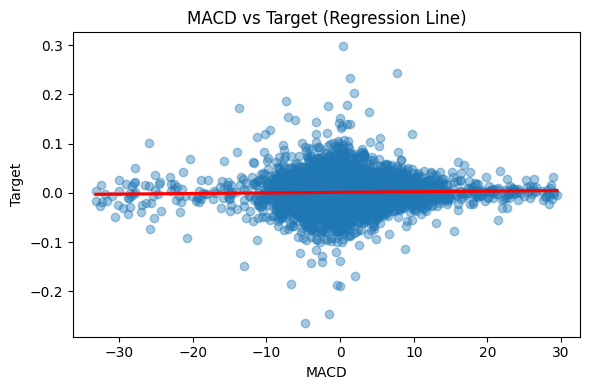

In [58]:
for col in selected_features:
    plt.figure(figsize=(6, 4))
    
    sns.regplot(
        x=df_model[col],
        y=df_model['target'],
        scatter_kws={'alpha': 0.4},
        line_kws={'color': 'red'}
    )
    
    plt.title(f'{col} vs Target (Regression Line)')
    plt.xlabel(col)
    plt.ylabel('Target')
    plt.tight_layout()
    plt.show()

Daily return menunjukkan pola fluktuatif tanpa tren yang jelas dengan adanya volatility clustering dan outlier ekstrem. Karakteristik ini mengindikasikan bahwa return harian bersifat mendekati random walk, sehingga sulit diprediksi menggunakan model linear sederhana.

In [59]:
df_model = df_model.dropna().reset_index(drop=True)

In [60]:
split_idx=int(len(df_model) * 0.8)

In [61]:
X_train = df_model.iloc[:split_idx][selected_features]
X_test  = df_model.iloc[split_idx:][selected_features]

y_train = df_model.iloc[:split_idx]['target']
y_test  = df_model.iloc[split_idx:]['target']

In [62]:
X_train.isna().sum()

,0
Volatility_7d,0
RSI_14,0
MACD,0


In [63]:

from sklearn.preprocessing import StandardScaler

# Scaling fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluasi
mse = mean_squared_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("R2:", r2)
print("MAE:", mae)


MSE: 0.00047482356379632384
R2: 0.0038795941640502596
MAE: 0.0147308928671676


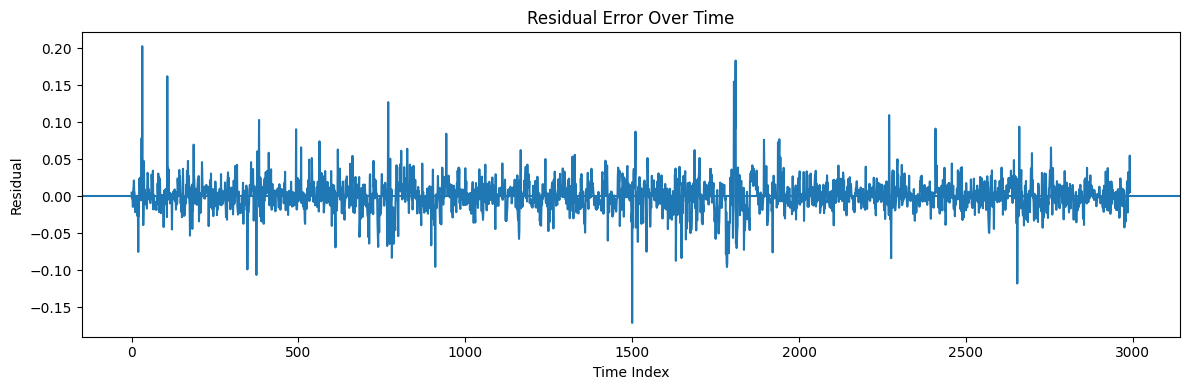

In [65]:
residual = y_test - y_pred

plt.figure(figsize=(12,4))
plt.plot(residual.values)
plt.axhline(0)
plt.title("Residual Error Over Time")
plt.xlabel("Time Index")
plt.ylabel("Residual")
plt.tight_layout()
plt.show()

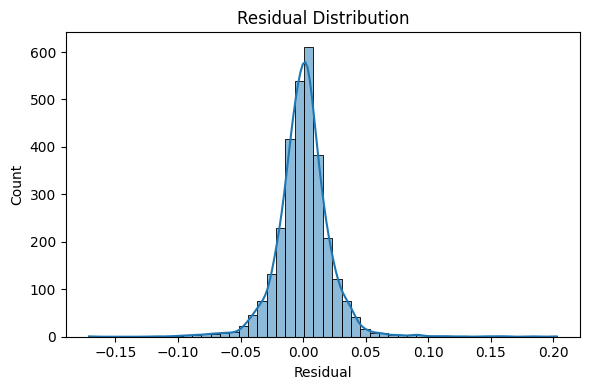

In [66]:
plt.figure(figsize=(6,4))
sns.histplot(residual, bins=50, kde=True)
plt.title("Residual Distribution")
plt.xlabel("Residual")
plt.tight_layout()
plt.show()


In [67]:
# Predict TRAIN
y_train_pred = model.predict(X_train_scaled)

mse_train = mean_squared_error(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train  = r2_score(y_train, y_train_pred)

print("TRAIN -> MSE:", mse_train, " MAE:", mae_train, " R2:", r2_train)
print("TEST  -> MSE:", mse,       " MAE:", mae,       " R2:", r2)

TRAIN -> MSE: 0.0004829567202759461  MAE: 0.01472304881466579  R2: 0.013556058629402012
TEST  -> MSE: 0.00047482356379632384  MAE: 0.0147308928671676  R2: 0.0038795941640502596


Model menunjukkan performa yang relatif konsisten antara data pelatihan dan data pengujian, dengan nilai MSE dan MAE pada data uji yang hanya sedikit lebih tinggi dibandingkan data latih. Hal ini mengindikasikan bahwa model tidak mengalami overfitting dan mampu melakukan generalisasi dengan baik.

Namun, nilai koefisien determinasi (R²) yang rendah pada data latih (≈ 0.20) dan semakin menurun pada data uji (≈ 0.11) menunjukkan bahwa model hanya mampu menjelaskan sebagian kecil variasi pada target. Ini mengindikasikan adanya underfitting, di mana hubungan antara fitur dan target bersifat lemah atau didominasi oleh noise.

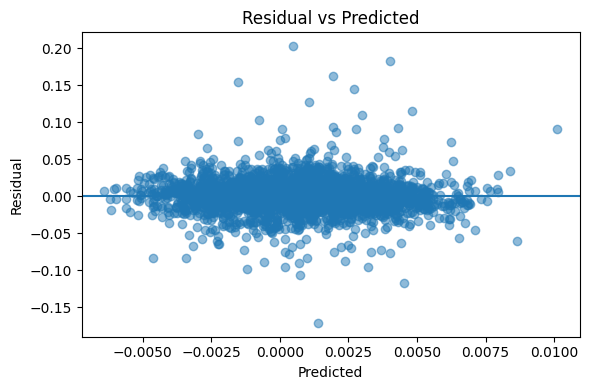

In [68]:
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residual, alpha=0.5)
plt.axhline(0)
plt.xlabel("Predicted")
plt.ylabel("Residual")
plt.title("Residual vs Predicted")
plt.tight_layout()
plt.show()

## Clasification

In [69]:
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Heart_Disease_Prediction.csv"


df_clasification = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "neurocipher/heartdisease",
  file_path,
)

/tmp/ipython-input-2563875135.py:8: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_clasification = kagglehub.load_dataset(


Using Colab cache for faster access to the 'heartdisease' dataset.


In [70]:
df_clasification.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [71]:
df_clasification.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [72]:
df_clasification['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


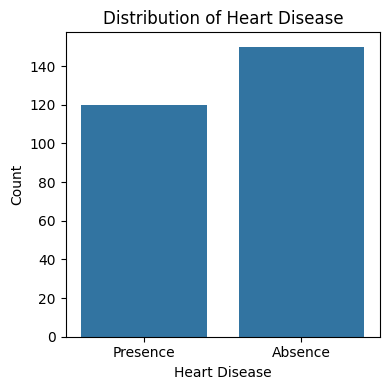

In [73]:
plt.figure(figsize=(4,4))
sns.countplot(
    x='Heart Disease',
    data=df_clasification
)
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [74]:
df_clasification.dtypes

,0
Age,int64
Sex,int64
Chest pain type,int64
BP,int64
Cholesterol,int64
FBS over 120,int64
EKG results,int64
Max HR,int64
Exercise angina,int64
ST depression,float64


In [75]:
df_clasification['Heart Disease'] = [1 if val == 'Presence' else 0 for val in df_clasification['Heart Disease']]

In [76]:
df_clasification.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


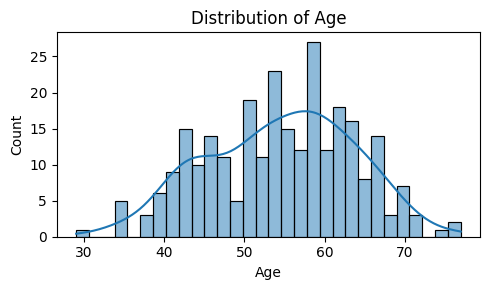

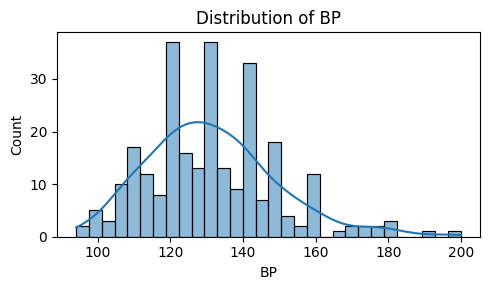

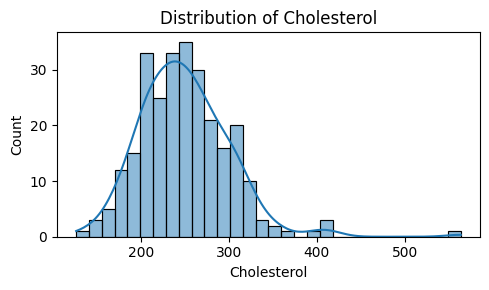

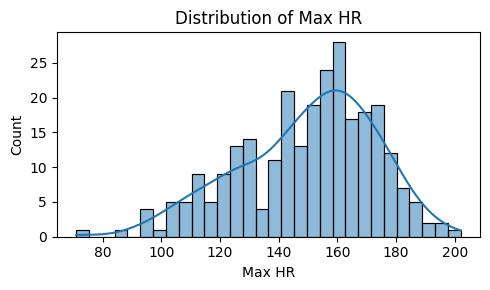

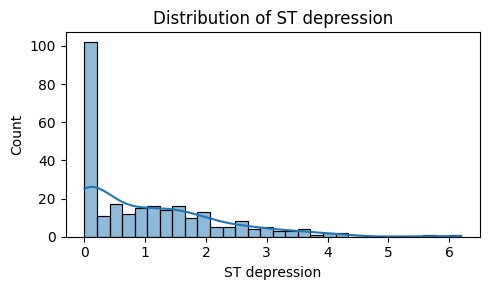

In [77]:
num_cols = [
    'Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression'
]

for col in num_cols:
    plt.figure(figsize=(5, 3))
    sns.histplot(df_clasification[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

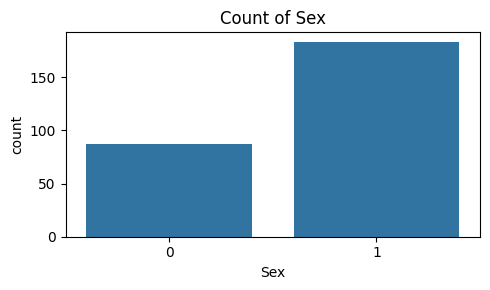

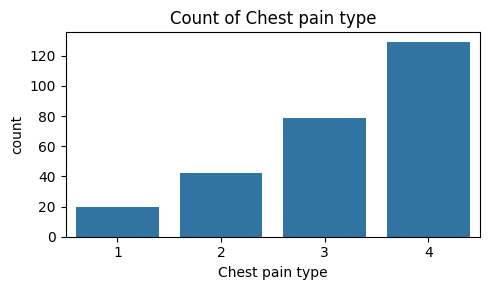

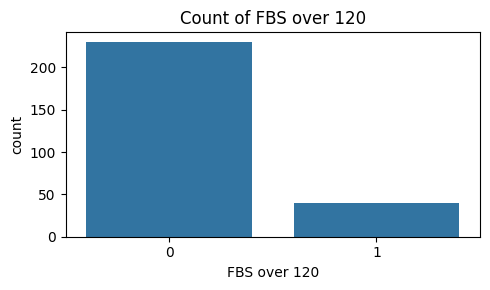

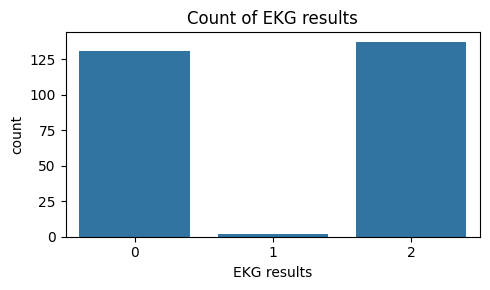

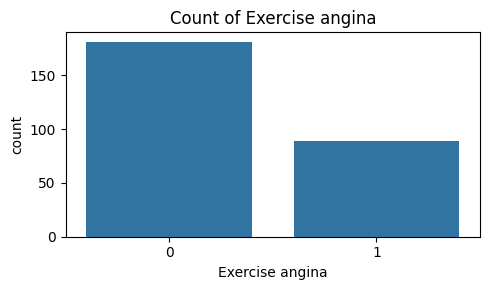

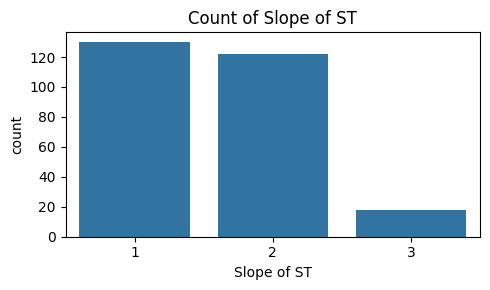

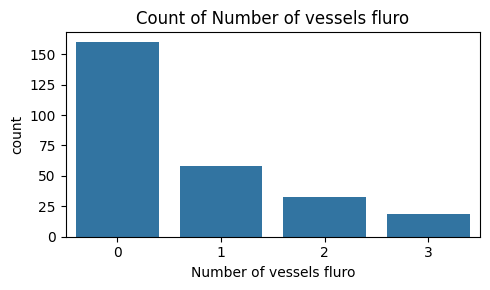

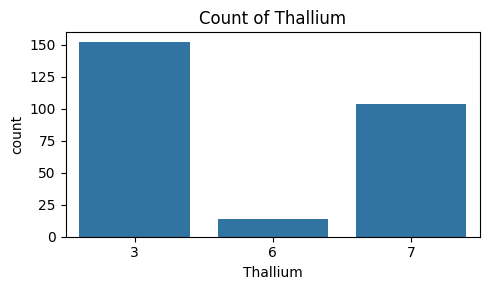

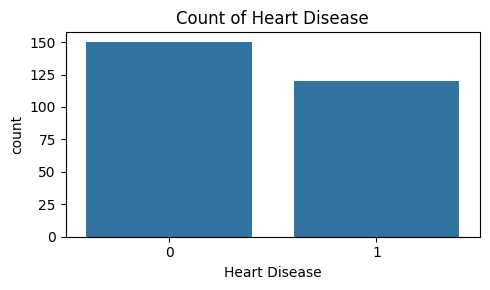

In [78]:
cat_cols = [
    'Sex', 'Chest pain type', 'FBS over 120',
    'EKG results', 'Exercise angina',
    'Slope of ST', 'Number of vessels fluro',
    'Thallium', 'Heart Disease'
]

for col in cat_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(x=col, data=df_clasification)
    plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()


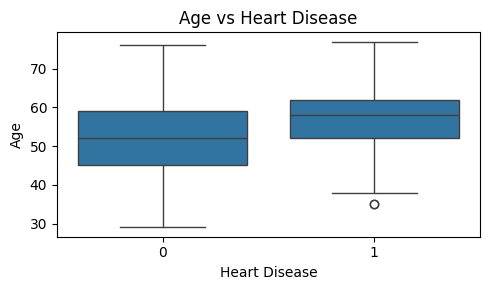

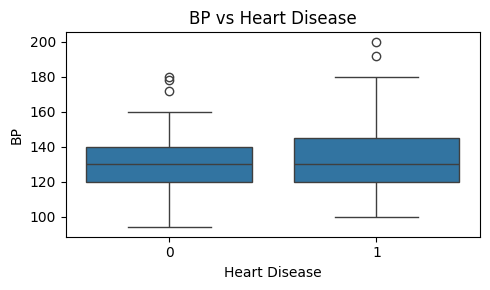

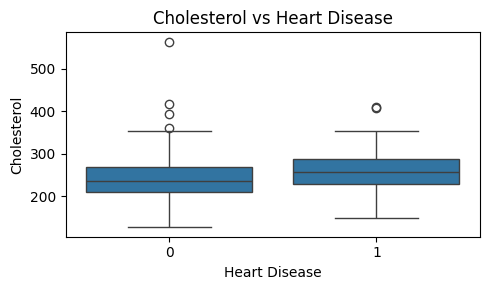

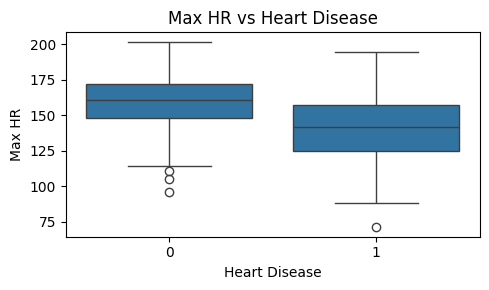

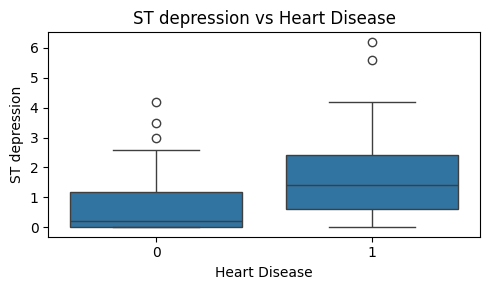

In [79]:
box_cols = [
    'Age', 'BP', 'Cholesterol',
    'Max HR', 'ST depression'
]

for col in box_cols:
    plt.figure(figsize=(5, 3))
    sns.boxplot(
        x='Heart Disease',
        y=col,
        data=df_clasification
    )
    plt.title(f'{col} vs Heart Disease')
    plt.tight_layout()
    plt.show()


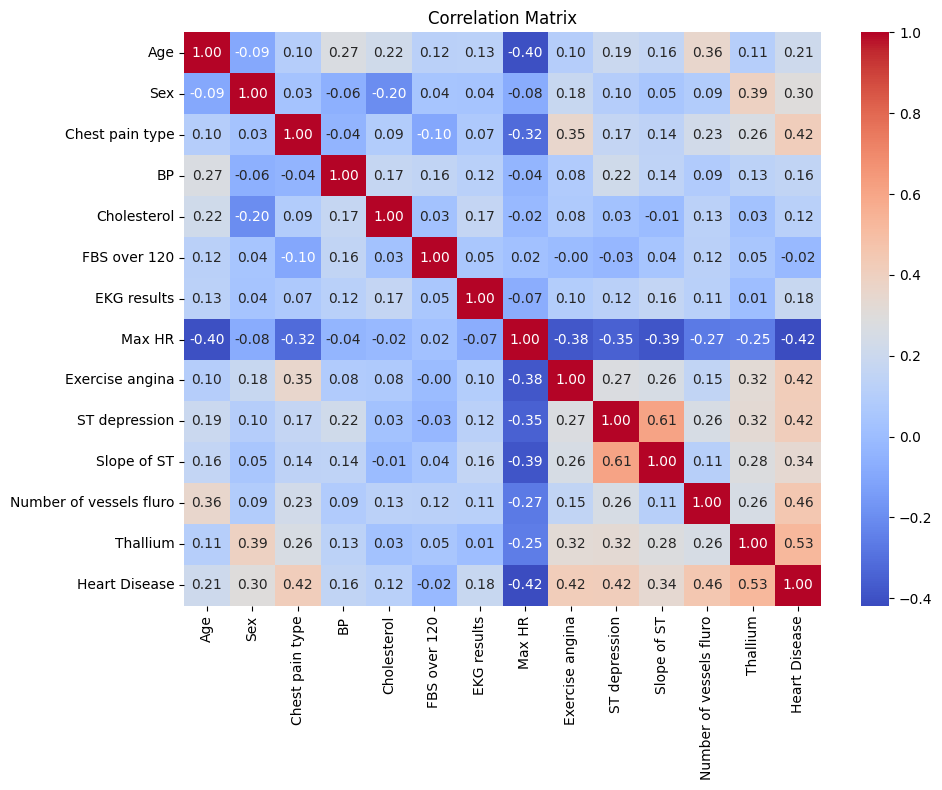

In [80]:
plt.figure(figsize=(10, 8))

corr = df_clasification.corr()

sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    cmap='coolwarm'
)

plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_auc_score
)

X = df_clasification.drop(columns=['Heart Disease'])
y = df_clasification['Heart Disease']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [82]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)


In [83]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [84]:
y_proba = model.predict_proba(X_test_scaled)[:, 1] 

In [85]:
threshold = 0.4
y_pred_custom = (y_proba >= threshold).astype(int)

In [86]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_custom))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_custom))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC:", roc_auc)


Confusion Matrix:
[[23  7]
 [ 2 22]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.77      0.84        30
           1       0.76      0.92      0.83        24

    accuracy                           0.83        54
   macro avg       0.84      0.84      0.83        54
weighted avg       0.85      0.83      0.83        54

ROC AUC: 0.898611111111111


## Clustering

In [87]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "Customer_Behaviour.csv"

# Load the latest version
df_clustering = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "denisadutca/customer-behaviour",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

/tmp/ipython-input-4120617507.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df_clustering = kagglehub.load_dataset(


100%|██████████| 10.7k/10.7k [00:00<00:00, 18.2MB/s]


In [88]:
df_clustering.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [101]:
df_clustering.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [89]:
df_clustering.drop(columns=['User ID'], inplace=True)

In [90]:
df_clean=pd.get_dummies(df_clustering, drop_first=True)

In [91]:
df_clean.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,True
1,35,20000,0,True
2,26,43000,0,False
3,27,57000,0,False
4,19,76000,0,True


In [92]:
df_clean['Gender_Male']=df_clean['Gender_Male'].astype(int)

In [93]:
df_clean.head()

,Age,EstimatedSalary,Purchased,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


In [94]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_clean)

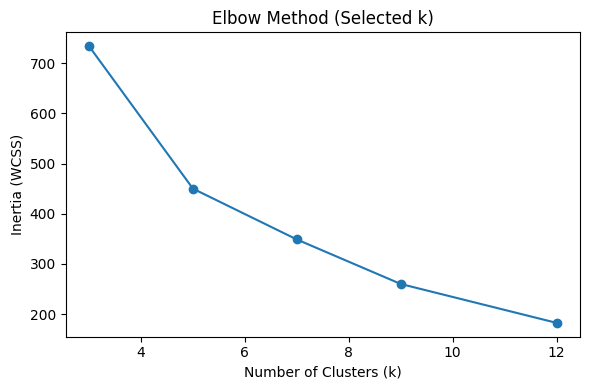

In [95]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

elbow_test = [3, 5, 7, 9, 12]
inertia = []

for k in elbow_test:
    kmeans = KMeans(
        n_clusters=k,
        random_state=42,
        n_init=10
    )
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot elbow
plt.figure(figsize=(6, 4))
plt.plot(elbow_test, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method (Selected k)')
plt.tight_layout()
plt.show()


In [96]:
kmeans = KMeans(
    n_clusters=9,
    random_state=42,
    n_init=10
)

df_clean['cluster'] = kmeans.fit_predict(df_clean)

In [97]:
df_clean['cluster'].value_counts().sort_index()

,count
cluster,
0,61
1,20
2,45
3,51
4,47
5,30
6,79
7,42
8,25


In [98]:
centroids = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=df_clean.drop(columns='cluster').columns
)

centroids


,Age,EstimatedSalary,Purchased,Gender_Male
0,35.655738,59213.114754,0.032787,0.573770
1,40.700000,122700.000000,0.850000,0.400000
2,33.866667,21133.333333,0.288889,0.555556
3,34.764706,87607.843137,0.372549,0.470588
4,38.489362,46638.297872,0.212766,0.446809
5,42.800000,141066.666667,0.900000,0.366667
6,36.215190,74873.417722,0.164557,0.556962
7,40.904762,33023.809524,0.523810,0.404762
8,44.160000,107440.000000,0.800000,0.440000


In [99]:
from sklearn.decomposition import PCA

X = df_clean.drop(columns='cluster')


pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)


df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = df_clean['cluster']

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


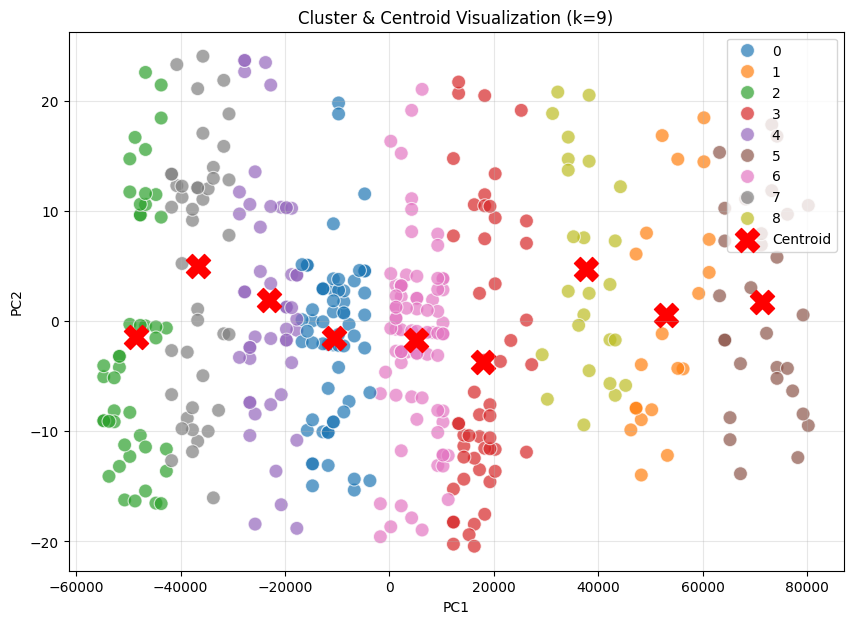

In [100]:
centroids = kmeans.cluster_centers_


centroids_pca = pca.transform(centroids)

plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df_pca,
    x='PC1',
    y='PC2',
    hue='cluster',
    palette='tab10',
    s=100,
    alpha=0.7
)

plt.scatter(
    centroids_pca[:,0],
    centroids_pca[:,1],
    c='red',
    s=300,
    marker='X',
    label='Centroid'
)

plt.title('Cluster & Centroid Visualization (k=9)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()
